In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [21]:
from scipy.stats import chi2_contingency

In [6]:
path = os.getcwd() + '/data/clean_data.csv'
df = pd.read_csv(path)

In [7]:
fraud_df = df[df['EVENT_LABEL']==1]
legit_df = df[df['EVENT_LABEL']==0][:8112]
under_df = pd.concat([fraud_df, legit_df])
under_df = under_df.sample(frac=1)

EVENT_LABEL
1    0.5
0    0.5
Name: count, dtype: float64


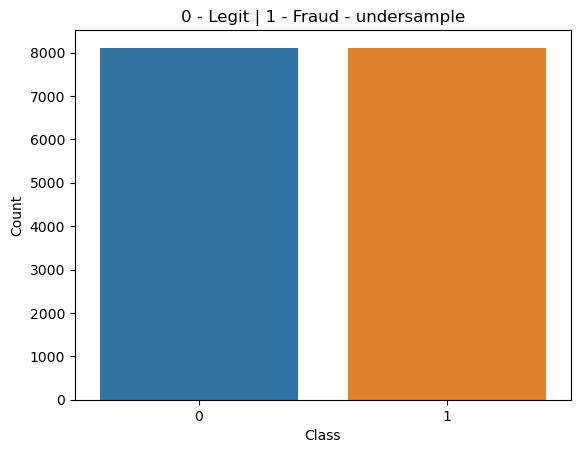

In [8]:
print(under_df['EVENT_LABEL'].value_counts()/len(under_df))
sns.countplot(under_df, x='EVENT_LABEL')
plt.title('0 - Legit | 1 - Fraud - undersample')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [46]:
chi2_stats = {}
columns = under_df.columns
for column in columns:
    conti_table = pd.crosstab(under_df[column], under_df['EVENT_LABEL'])
    chi2,p_value,_,_ = chi2_contingency(conti_table)
    chi2_stats[column] = {'chi2_statistic':chi2, 'p_value':p_value}

In [55]:
sorted_chi2_results = sorted(chi2_stats.items(), key=lambda x: x[1]['chi2_statistic'], reverse=True)

In [56]:
sorted_chi2_results

[('EVENT_LABEL', {'chi2_statistic': 16220.000246548323, 'p_value': 0.0}),
 ('inital_amount',
  {'chi2_statistic': 9621.419047619049, 'p_value': 0.3115709123176491}),
 ('ip_address',
  {'chi2_statistic': 8619.968253968254, 'p_value': 5.685327415625177e-09}),
 ('billing_postal',
  {'chi2_statistic': 7231.667388167388, 'p_value': 0.807364222967344}),
 ('transaction_adj_amt',
  {'chi2_statistic': 7052.965550302131, 'p_value': 0.0}),
 ('card_bin',
  {'chi2_statistic': 6189.472938172938, 'p_value': 1.895254601966705e-30}),
 ('billing_city',
  {'chi2_statistic': 6138.780519480519, 'p_value': 0.391652822677459}),
 ('account_age_days',
  {'chi2_statistic': 5866.829736929736, 'p_value': 7.684582351497765e-44}),
 ('historic_velocity',
  {'chi2_statistic': 4902.090009990009, 'p_value': 0.12025160559574617}),
 ('transaction_amt',
  {'chi2_statistic': 3950.6797389283065, 'p_value': 2.349235955694429e-47}),
 ('transaction_env', {'chi2_statistic': 2106.0830855544414, 'p_value': 0.0}),
 ('transaction_t